# Topic Modelling with Latent Dirichlet Allocation (LDA)

Topic modeling is a type of statistical modeling for discovering the topics that occur in a collection of documents. By doing topic modeling, we build clusters of words rather than clusters of texts.

LDA is a generative probabilistic model that assumes each topic is a mixture over an underlying set of words, and each document is a mixture of over a set of topic probabilities.

We can describe the generative process of LDA as, given the M number of documents, N number of words, and prior K number of topics, the model trains to output:

- psi, the distribution of words for each topic K

- phi, the distribution of topics for each document i

In [8]:
import sys
print(sys.executable)

C:\Users\choij\anaconda3\envs\iowa_proj3\python.exe


## Tokenize text for LDA
To use ```space.load('en')```, download it using the following:

```python3 -m spacy download en```

In [13]:
import spacy

# spacy.load('en')
spacy.load("en_core_web_sm")
# nlp=spacy.load("en_core_web_sm")

from spacy.lang.en import English
parser = English()

def tokenize(text):
    lda_tokens = []
    tokens = parser(text)
    for token in tokens:
        if token.orth_.isspace():
            continue
        # elif token.like_url:
        #     lda_tokens.append('URL')
        # elif token.orth_.startswith('@'):
        #     lda_tokens.append('SCREEN_NAME')
        else:
            lda_tokens.append(token.lower_)
    return lda_tokens

## Lemmatization using NLTK WordNet

Using ```WordNetLemmatizer``` to get the root word.

In [14]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('wordnet')

from nltk.stem.wordnet import WordNetLemmatizer
def get_lemma(word):
    return WordNetLemmatizer().lemmatize(word)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\choij\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Getting a list of StopWords 

In [15]:
nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\choij\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Text pre-processing

Following steps are followed for text pre-processing before using LDA:

1. Tokenize text using our tokenizer above
1. Remove tokens of length less than 4
1. Remove tokens that are stop words
1. Reduce tokens to their base form using our Lemmatizer above

In [16]:
def prepare_text_for_lda(text):
    tokens = tokenize(text)
    tokens = [token for token in tokens if len(token) > 4]
    tokens = [token for token in tokens if token not in en_stop]
    tokens = [(token) for token in tokens]
    return tokens


## Processing Pubmed Articles

In [17]:
import random
import pandas as pd

text_data = []
# pubmed_dataset = pd.read_csv('Pubmed_Articles.csv', encoding = "ISO-8859-1")
pubmed_dataset = pd.read_csv('../COVID-Dataset/metadata_April10_2020.csv', encoding = "ISO-8859-1")
print("Total Articles: ", len(pubmed_dataset))


Total Articles:  51078


In [18]:
for index, row in pubmed_dataset.iterrows():
    tokens = prepare_text_for_lda(str(row['title'])+str(row['abstract']))
    if random.random() > .99:
        print(tokens)
    text_data.append(tokens)

ts', 'among', 'protein', 'variants', 'encoded', 'short', 'alias', 'dmcpd1bs', 'melanogaster', 'variant', 'short', 'necessary', 'sufficient', 'viability', 'fruit', 'single', 'repeat', 'active', 'standard', 'peptide', 'substrates', 'localized', 'secretory', 'pathway', 'enzyme', 'found', 'monomer', 'solution', 'homodimer', 'crystal', 'structure', 'features', 'protomer', 'terminal', 'residue', 'catalytic', 'domain', 'î±/î²-hydrolase', 'terminal', 'residue', 'transthyretin', 'domain', 'overall', 'dmcpd1bs', 'conforms', 'structure', 'funnelins', 'metallopeptidases', 'unique', 'structural', 'elements', 'potentially', 'involved', 'regulation', 'activity', 'contiguous', 'surface', 'cysteines', 'become', 'palmitoylated', 'target', 'enzyme', 'membranes', 'providing', 'control', 'localization', 'surface', 'targetable', 'peptidases', 'would', 'provide', 'regulatory', 'mechanism', 'proteolytic', 'inactivation', 'given', 'fruit', 'possesses', 'orthologs', 'proteolytically', 'competent', 'funnelins', 

## Creating BOW with Dictionary

Doc2bow: Convert document (a list of words) into the bag-of-words format = list of (token_id, token_count) 2-tuples

In [19]:
from gensim import corpora
dictionary = (text_data)
#lecture 4/8/21: around 12:00
corpus = [dictionary.doc2bow(text) for text in text_data]
print(len(corpus))
print(corpus[0])
print("-----")
print(corpus[1])
print("-----")
print(corpus[2])
print("-----")
print(corpus[3])

import pickle
pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('../our_data/dictionary.gensim')

51078
[(0, 1), (1, 2), (2, 3), (3, 3), (4, 1), (5, 4), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 2), (13, 1), (14, 1), (15, 1), (16, 1), (17, 2), (18, 1), (19, 1), (20, 1), (21, 2), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 6), (29, 1), (30, 2), (31, 1), (32, 1), (33, 1), (34, 2), (35, 1), (36, 1), (37, 1), (38, 2), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 2), (54, 1), (55, 4), (56, 1), (57, 1), (58, 3), (59, 1), (60, 2), (61, 1), (62, 2), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 3), (71, 1), (72, 1), (73, 2), (74, 1), (75, 9), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 2), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 4), (91, 2), (92, 2), (93, 1), (94, 1), (95, 2), (96, 2), (97, 1)]
-----
[(96, 1), (98, 1), (99, 1), (100, 1), (101, 1), (102, 1), (103, 1), (104, 1), (105, 1), (106, 1), (107, 1), (108, 1

## Training LDA model

In [15]:
import time
import gensim
from datetime import datetime

NUM_TOPICS = [5,6,7,8,9,10]
#have ldamodel for each num_topics

for each in NUM_TOPICS:
    now = datetime.now()
    current_time = now.strftime("%H:%M:%S")
    print("Current Time =", current_time)
    tic = time.perf_counter()
    print(tic)
    
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=each, id2word=dictionary, passes=15, random_state=42)
    name='model_'+str(each)+'.gensim'
    # print(name)
    ldamodel.save(name)
    topics=ldamodel.print_topics(num_words=10)
    for topic in topics: 
        print(topic)
        print("------")
    
    toc = time.perf_counter()
    print(toc)
    with open("log.txt", "a") as log:
        log.write(f"Finished the traversing of {each} topics in {toc - tic:0.4f} seconds")
        log.write("\n")

1359.0574982
(0, '0.021*"virus" + 0.009*"vaccine" + 0.008*"viruses" + 0.008*"samples" + 0.007*"detection" + 0.007*"coronavirus" + 0.006*"calves" + 0.006*"antibody" + 0.006*"antibodies" + 0.006*"strains"')
------
(1, '0.024*"cells" + 0.018*"infection" + 0.012*"virus" + 0.011*"immune" + 0.009*"viral" + 0.009*"expression" + 0.008*"induced" + 0.008*"response" + 0.006*"infected" + 0.006*"responses"')
------
(2, '0.020*"protein" + 0.016*"virus" + 0.011*"viral" + 0.010*"proteins" + 0.007*"coronavirus" + 0.006*"viruses" + 0.006*"binding" + 0.006*"activity" + 0.006*"cells" + 0.005*"replication"')
------
(3, '0.026*"patients" + 0.025*"respiratory" + 0.010*"clinical" + 0.010*"infection" + 0.010*"infections" + 0.009*"acute" + 0.009*"cases" + 0.008*"virus" + 0.008*"influenza" + 0.008*"severe"')
------
(4, '0.013*"health" + 0.008*"disease" + 0.006*"diseases" + 0.006*"infectious" + 0.005*"control" + 0.005*"public" + 0.005*"based" + 0.005*"transmission" + 0.004*"outbreak" + 0.004*"model"')
------
1743

In [14]:
# import gensim
# NUM_TOPICS = 5
# ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15, random_state=42)
# ldamodel.save('model5.gensim')
# topics=ldamodel.print_topics(num_words=10)
# for topic in topics: 
#     print(topic)
#     print("------")

Error: Pip module Unable to parse debugpy output, please log an issue with https://github.com/microsoft/vscode-jupyter is required for debugging cells. You will need to install it to debug cells.

## Compute Model Perplexity and Coherence Score

In [5]:
import gensim
#load lda models
lda5 = gensim.models.ldamodel.LdaModel.load('model_5.gensim')
lda6 = gensim.models.ldamodel.LdaModel.load('model_6.gensim')
lda7 = gensim.models.ldamodel.LdaModel.load('model_7.gensim')
lda8 = gensim.models.ldamodel.LdaModel.load('model_8.gensim')
lda9 = gensim.models.ldamodel.LdaModel.load('model_9.gensim')
lda10 = gensim.models.ldamodel.LdaModel.load('model_10.gensim')


In [33]:
import gensim
from gensim.models.coherencemodel import CoherenceModel
from gensim.test.utils import datapath

# Perplexity
# It captures how surprised a model is of new data it has not seen before, and is measured as the normalized log-likelihood of a held-out test set.
print('\nPerplexity 5: ', lda5.log_perplexity(corpus))  # a measure of how good the model is. lower the better.
print('\nPerplexity 6: ', lda6.log_perplexity(corpus))  # a measure of how good the model is. lower the better.
print('\nPerplexity 7: ', lda7.log_perplexity(corpus))  # a measure of how good the model is. lower the better.
print('\nPerplexity 8: ', lda8.log_perplexity(corpus))  # a measure of how good the model is. lower the better.
print('\nPerplexity 9: ', lda9.log_perplexity(corpus))  # a measure of how good the model is. lower the better.
print('\nPerplexity 10: ', lda10.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
# Measures score of topics by measuring the degree of semantic similarity between high scoring words in the topic.
coherence_model_lda5 = CoherenceModel(model=lda5, texts=text_data, dictionary=dictionary, coherence='c_v')
coherence_model_lda6 = CoherenceModel(model=lda6, texts=text_data, dictionary=dictionary, coherence='c_v')
coherence_model_lda7 = CoherenceModel(model=lda7, texts=text_data, dictionary=dictionary, coherence='c_v')
coherence_model_lda8 = CoherenceModel(model=lda8, texts=text_data, dictionary=dictionary, coherence='c_v')
coherence_model_lda9 = CoherenceModel(model=lda9, texts=text_data, dictionary=dictionary, coherence='c_v')
coherence_model_lda10 = CoherenceModel(model=lda10, texts=text_data, dictionary=dictionary, coherence='c_v')

coherence_lda5 = coherence_model_lda5.get_coherence()
coherence_lda6 = coherence_model_lda6.get_coherence()
coherence_lda7 = coherence_model_lda7.get_coherence()
coherence_lda8 = coherence_model_lda8.get_coherence()
coherence_lda9 = coherence_model_lda9.get_coherence()
coherence_lda10 = coherence_model_lda10.get_coherence()
print('\nCoherence Score 5: ', coherence_lda5)
print('\nCoherence Score 6: ', coherence_lda6)
print('\nCoherence Score 7: ', coherence_lda7)
print('\nCoherence Score 8: ', coherence_lda8)
print('\nCoherence Score 9: ', coherence_lda9)
print('\nCoherence Score 10: ', coherence_lda10)



Perplexity 5:  -8.400906261482326

Perplexity 6:  -8.436505768590239

Perplexity 7:  -8.50737417114162

Perplexity 8:  -8.593880779081854

Perplexity 9:  -8.713707498477115

Perplexity 10:  -8.879348738888527

Coherence Score 5:  0.5534112693269291

Coherence Score 6:  0.5466868998497311

Coherence Score 7:  0.5582857885714337

Coherence Score 8:  0.5767325506914518

Coherence Score 9:  0.5861311443061686

Coherence Score 10:  0.5840254825614839


Not Often used to pick LDA model. As per https://towardsdatascience.com/evaluate-topic-model-in-python-latent-dirichlet-allocation-lda-7d57484bb5d0

"However, recent studies have shown that predictive likelihood (or equivalently, perplexity) and human judgment are often not correlated, and even sometimes slightly anti-correlated."

## Finding Model with Optimal K - Number of Topics

In [34]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    perplexity_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15, random_state=42)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        perplexity = model.log_perplexity(corpus)

        perplexity_values.append(perplexity)
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values, perplexity_values

In [ ]:
# Can take a long time to run.
model_list, coherence_values, perplexity_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=text_data, start=2, limit=40, step=2)

## Coherence

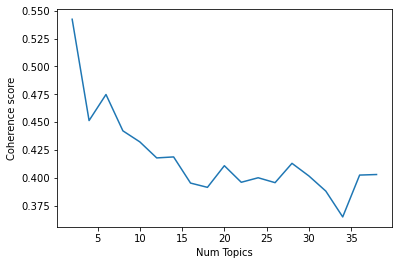

In [16]:
from matplotlib import pyplot as plt

# Show graph
limit=40; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")

plt.show()

## Perplexity

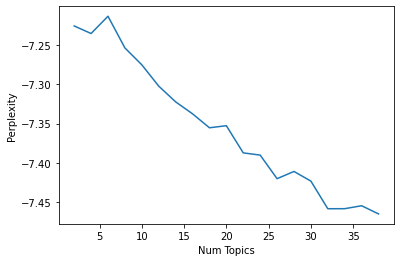

In [17]:
# Show graph
limit=40; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, perplexity_values)
plt.xlabel("Num Topics")
plt.ylabel("Perplexity")

plt.show()

## Top words in each Topic

In [18]:
topics = ldamodel.print_topics(num_words=10)
for topic in topics:
    print(topic)
    print('----------------------')

(0, '0.042*"cells" + 0.037*"il-18" + 0.026*"tumor" + 0.016*"il-12" + 0.013*"gamma" + 0.010*"antitumor" + 0.009*"cancer" + 0.007*"effect" + 0.007*"induced" + 0.007*"production"')
----------------------
(1, '0.017*"cells" + 0.010*"gamma" + 0.010*"patients" + 0.006*"production" + 0.005*"activity" + 0.005*"expression" + 0.005*"interferon" + 0.004*"clinical" + 0.004*"levels" + 0.004*"treatment"')
----------------------
(2, '0.023*"responses" + 0.017*"vaccine" + 0.016*"hiv-1" + 0.014*"specific" + 0.011*"gamma" + 0.010*"virus" + 0.009*"patients" + 0.008*"infected" + 0.008*"immune" + 0.008*"cells"')
----------------------
(3, '0.017*"cells" + 0.015*"infection" + 0.015*"gamma" + 0.012*"hiv-1" + 0.010*"specific" + 0.009*"infected" + 0.008*"responses" + 0.007*"patients" + 0.006*"expression" + 0.006*"associated"')
----------------------


In [6]:
import sys
print(sys.executable)

C:\Users\choij\anaconda3\envs\iowa_proj3\python.exe


In [8]:
topics5 = lda5.print_topics(num_words=10)
for topic in topics5:
    print(topic)
    print('----------------------')

(0, '0.021*"virus" + 0.009*"vaccine" + 0.008*"viruses" + 0.008*"samples" + 0.007*"detection" + 0.007*"coronavirus" + 0.006*"calves" + 0.006*"antibody" + 0.006*"antibodies" + 0.006*"strains"')
----------------------
(1, '0.024*"cells" + 0.018*"infection" + 0.012*"virus" + 0.011*"immune" + 0.009*"viral" + 0.009*"expression" + 0.008*"induced" + 0.008*"response" + 0.006*"infected" + 0.006*"responses"')
----------------------
(2, '0.020*"protein" + 0.016*"virus" + 0.011*"viral" + 0.010*"proteins" + 0.007*"coronavirus" + 0.006*"viruses" + 0.006*"binding" + 0.006*"activity" + 0.006*"cells" + 0.005*"replication"')
----------------------
(3, '0.026*"patients" + 0.025*"respiratory" + 0.010*"clinical" + 0.010*"infection" + 0.010*"infections" + 0.009*"acute" + 0.009*"cases" + 0.008*"virus" + 0.008*"influenza" + 0.008*"severe"')
----------------------
(4, '0.013*"health" + 0.008*"disease" + 0.006*"diseases" + 0.006*"infectious" + 0.005*"control" + 0.005*"public" + 0.005*"based" + 0.005*"transmissio

In [9]:
topics10 = lda10.print_topics(num_words=10)
for topic in topics10:
    print(topic)
    print('----------------------')

(0, '0.020*"virus" + 0.012*"calves" + 0.011*"strains" + 0.010*"porcine" + 0.008*"coronavirus" + 0.008*"diarrhea" + 0.008*"feline" + 0.008*"strain" + 0.007*"study" + 0.007*"infectious"')
----------------------
(1, '0.033*"cells" + 0.023*"infection" + 0.015*"immune" + 0.014*"expression" + 0.012*"viral" + 0.011*"response" + 0.011*"induced" + 0.011*"virus" + 0.009*"infected" + 0.007*"responses"')
----------------------
(2, '0.036*"vaccine" + 0.024*"antibody" + 0.024*"antibodies" + 0.018*"vaccines" + 0.015*"specific" + 0.012*"recombinant" + 0.012*"protein" + 0.012*"vaccination" + 0.012*"virus" + 0.011*"immune"')
----------------------
(3, '0.033*"respiratory" + 0.020*"virus" + 0.018*"infections" + 0.018*"detection" + 0.017*"viral" + 0.015*"influenza" + 0.015*"viruses" + 0.014*"children" + 0.012*"samples" + 0.010*"assay"')
----------------------
(4, '0.024*"health" + 0.009*"public" + 0.009*"outbreak" + 0.008*"control" + 0.008*"transmission" + 0.007*"disease" + 0.007*"epidemic" + 0.007*"china

C:\Users\choij\anaconda3\envs\iowa_proj3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
0
[('virus', 0.020233048), ('calves', 0.011688635), ('strains', 0.010557463), ('porcine', 0.010036563), ('coronavirus', 0.008493627), ('diarrhea', 0.008329268), ('feline', 0.008023352), ('strain', 0.007524862), ('study', 0.0073340153), ('infectious', 0.007158464)]
1
[('cells', 0.033239197), ('infection', 0.023430439), ('immune', 0.014792701), ('expression', 0.013969495), ('viral', 0.011913294), ('response', 0.0112772295), ('induced', 0.011213451), ('virus', 0.011142049), ('infected', 0.009181669), ('responses', 0.006582254)]
2
[('vaccine', 0.036136176), ('antibody', 0.024131984), ('antibodies', 0.023866864), ('vaccines

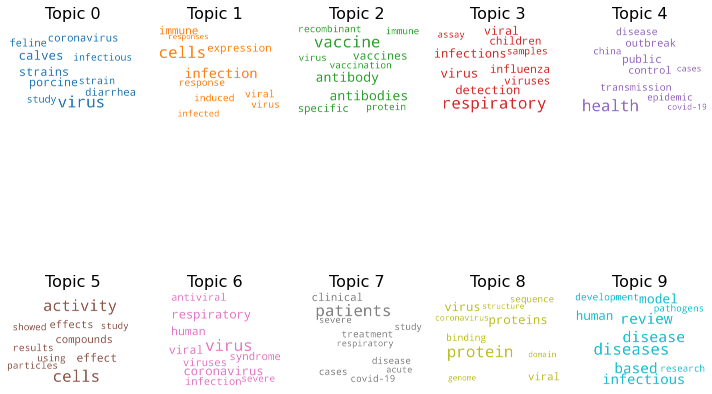

In [23]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda10.show_topics(formatted=False)
# topics = ldamodel.show_topics(formatted=False)

fig, axes = plt.subplots(2, 5, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    if i==10: break
    print(i)
    fig.add_subplot(ax)
    print(topics[i][1])
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

## Testing on new document

In [23]:
new_doc = 'Increase in efficacy of cancer radiotherapy by combination with whole-body low dose irradiation'
new_doc = prepare_text_for_lda(new_doc)
new_doc_bow = dictionary.doc2bow(new_doc)
print(new_doc_bow)
print(ldamodel.get_document_topics(new_doc_bow))

[(13, 1), (15, 1), (26, 1), (41, 1), (46, 1), (72, 1), (96, 1)]
[(0, 0.5564435), (1, 0.03187397), (2, 0.033370055), (3, 0.3783124)]


## Creating Visualization for Topics

In [17]:
import pickle 
dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')
corpus = pickle.load(open('corpus.pkl', 'rb'))
lda = gensim.models.ldamodel.LdaModel.load('model_10.gensim')

import pyLDAvis.gensim
lda_display = pyLDAvis.gensim.prepare(lda10, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)
pyLDAvis.save_html(lda_display, 'lda.html')

C:\Users\choij\anaconda3\envs\iowa_proj3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ModuleNotFoundError: No module named 'pyLDAvis.gensim'